# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | salinopolis
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | whistler
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | yangquan
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | praia da vitoria
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | prince rupert
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | woolgoolga
Processing Record 21 of Set 1 | gilgit
Processing Record 22 of Set 1 | tiksi
Pro

Processing Record 43 of Set 4 | bokani
Processing Record 44 of Set 4 | santa ana
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | sidi khaled
Processing Record 47 of Set 4 | afaahiti
Processing Record 48 of Set 4 | maua
Processing Record 49 of Set 4 | tsiombe
Processing Record 0 of Set 5 | gardnerville ranchos
Processing Record 1 of Set 5 | sandnessjoen
Processing Record 2 of Set 5 | buala
Processing Record 3 of Set 5 | hammerfest
Processing Record 4 of Set 5 | gulf shores
Processing Record 5 of Set 5 | lembar
City not found. Skipping...
Processing Record 6 of Set 5 | tangalle
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | szentlorinc
Processing Record 9 of Set 5 | sierra grande
Processing Record 10 of Set 5 | yarmouth
Processing Record 11 of Set 5 | peace river
Processing Record 12 of Set 5 | labrador city
Processing Record 13 of Set 5 | dudinka
Processing Record 14 of Set 5 | midelt
Processing Record 15 of Set 5 | port saint john's
Process

Processing Record 34 of Set 8 | el granada
Processing Record 35 of Set 8 | chazuta
Processing Record 36 of Set 8 | pavlodar
Processing Record 37 of Set 8 | orapa
Processing Record 38 of Set 8 | ulladulla
Processing Record 39 of Set 8 | narra
Processing Record 40 of Set 8 | klotze
Processing Record 41 of Set 8 | savonlinna
Processing Record 42 of Set 8 | cidade velha
Processing Record 43 of Set 8 | strasburg
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | tolanaro
Processing Record 46 of Set 8 | urzhum
Processing Record 47 of Set 8 | cobija
Processing Record 48 of Set 8 | tommot
Processing Record 49 of Set 8 | nettuno
Processing Record 0 of Set 9 | savave village
City not found. Skipping...
Processing Record 1 of Set 9 | menongue
Processing Record 2 of Set 9 | eyl
Processing Record 3 of Set 9 | yadrin
Processing Record 4 of Set 9 | zyrya
Processing Record 5 of Set 9 | tura
Processing Record 6 of Set 9 | bengkulu
Processing Record 7 of Set 9 | newman
Processing

Processing Record 25 of Set 12 | qarqaraly
Processing Record 26 of Set 12 | lincheng
Processing Record 27 of Set 12 | sao miguel
Processing Record 28 of Set 12 | iligan
Processing Record 29 of Set 12 | piti village
Processing Record 30 of Set 12 | kuching
Processing Record 31 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 32 of Set 12 | troitsko-pechorsk
Processing Record 33 of Set 12 | howard springs
Processing Record 34 of Set 12 | hoi an
Processing Record 35 of Set 12 | leer
Processing Record 36 of Set 12 | ouro preto do oeste
Processing Record 37 of Set 12 | minab
Processing Record 38 of Set 12 | bel ombre
Processing Record 39 of Set 12 | karungdong
Processing Record 40 of Set 12 | wewak
Processing Record 41 of Set 12 | hasaki
Processing Record 42 of Set 12 | krasnogorskoye
Processing Record 43 of Set 12 | gobabis
Processing Record 44 of Set 12 | fauske
Processing Record 45 of Set 12 | aqadyr
Processing Record 46 of Set 12 | usak
---------------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,84,79,0.89,NZ,1700643818
1,salinopolis,-0.6136,-47.3561,26.76,79,28,5.14,BR,1700644052
2,adamstown,-25.0660,-130.1015,20.69,65,3,2.60,PN,1700643808
3,wailua homesteads,22.0669,-159.3780,23.44,85,100,7.72,US,1700643822
4,port-aux-francais,-49.3500,70.2167,4.13,77,61,10.35,TF,1700643807


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,84,79,0.89,NZ,1700643818
1,salinopolis,-0.6136,-47.3561,26.76,79,28,5.14,BR,1700644052
2,adamstown,-25.0660,-130.1015,20.69,65,3,2.60,PN,1700643808
3,wailua homesteads,22.0669,-159.3780,23.44,85,100,7.72,US,1700643822
4,port-aux-francais,-49.3500,70.2167,4.13,77,61,10.35,TF,1700643807


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

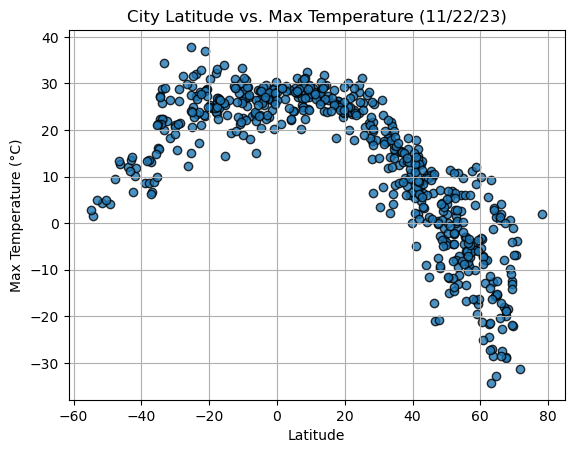

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

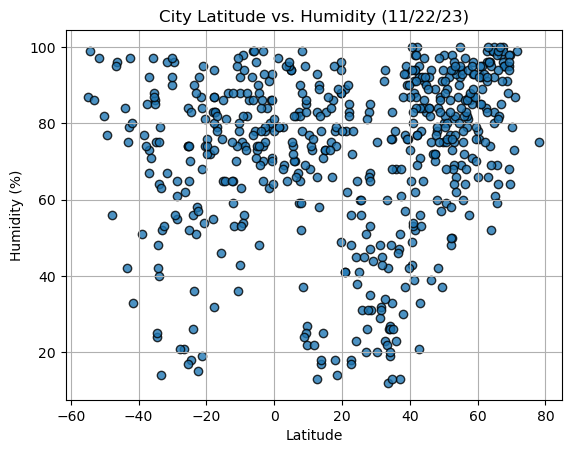

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

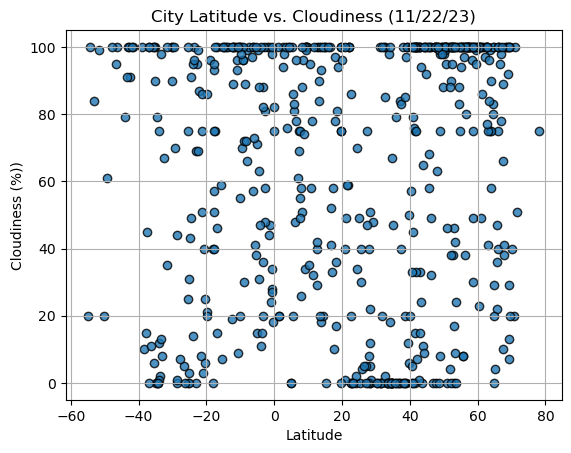

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

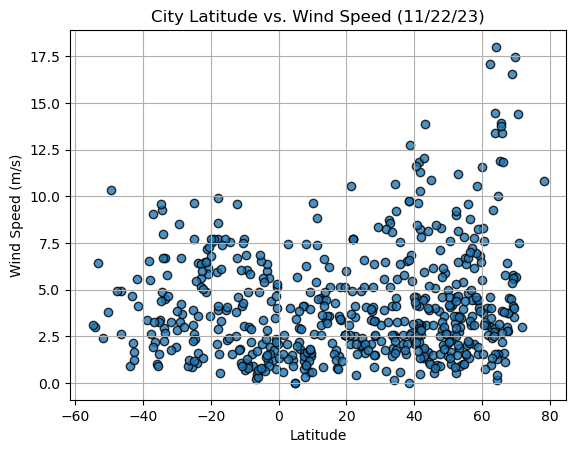

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wailua homesteads,22.0669,-159.3780,23.44,85,100,7.72,US,1700643822
5,nantucket,41.2835,-70.0995,8.08,91,100,11.83,US,1700643828
6,bilibino,68.0546,166.4372,-18.36,95,100,4.54,RU,1700643615
7,aasiaat,68.7098,-52.8699,-9.78,91,100,4.49,GL,1700643834
8,stanley,54.8680,-1.6985,9.74,92,75,6.69,GB,1700643814


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,84,79,0.89,NZ,1700643818
1,salinopolis,-0.6136,-47.3561,26.76,79,28,5.14,BR,1700644052
2,adamstown,-25.0660,-130.1015,20.69,65,3,2.60,PN,1700643808
4,port-aux-francais,-49.3500,70.2167,4.13,77,61,10.35,TF,1700643807
13,grytviken,-54.2811,-36.5092,1.51,99,100,3.00,GS,1700643815


###  Temperature vs. Latitude Linear Regression Plot

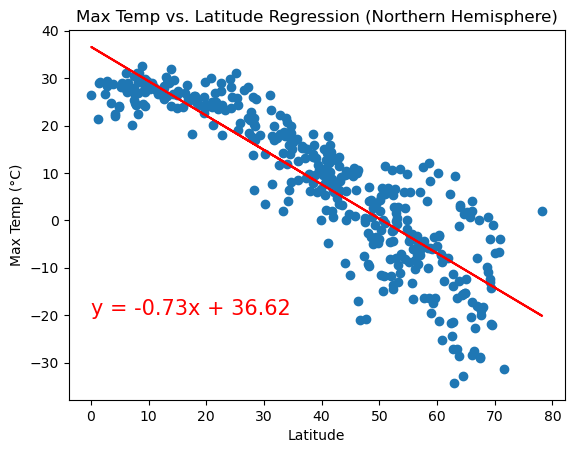

The r-value is: 0.7759017487967308


In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       'Max Temp vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Max Temp (°C)', (0, -20))

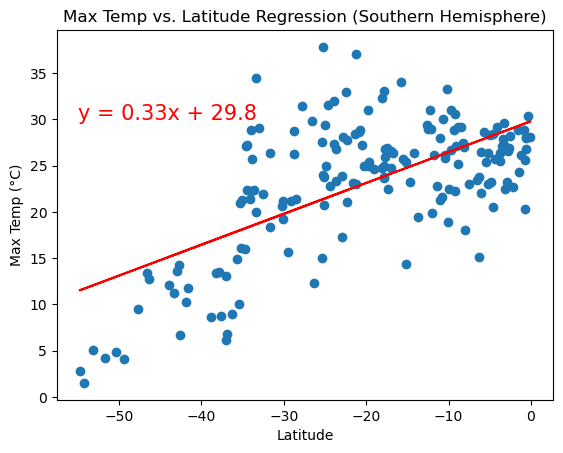

The r-value is: 0.4141236799351335


In [24]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       'Max Temp vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Max Temp (°C)', (-55, 30))

**Discussion about the linear relationship:** The temperature clearly decreases as one moves away from the equator towards the poles in the Northern Hemisphere, which is consistent with our understanding of climate patterns. The strong negative correlation is supported by the high r-value, indicating that latitude is a major factor in determining temperature in this region.

Conversely, in the Southern Hemisphere, where the data is looking at latitudes closer to the equator, there's a positive correlation with temperatures rising as one moves towards the equator. The correlation is positive but not as strong as in the Northern Hemisphere, which may be due to the Southern Hemisphere having a larger proportion of oceanic area, which can moderate temperature changes.

Overall, the analysis demonstrates the significant impact that latitude has on temperature, with the relationship being inverse in the Northern Hemisphere compared to the Southern Hemisphere. This is in line with general expectations since temperatures tend to be higher closer to the equator and lower as one moves towards the poles.

### Humidity vs. Latitude Linear Regression Plot

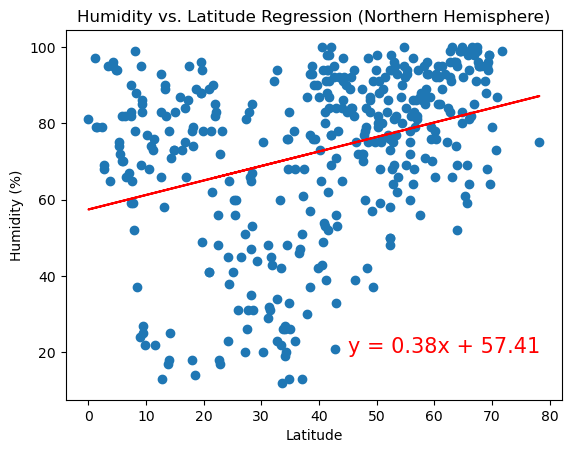

The r-value is: 0.10784933802876874


In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       'Humidity vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Humidity (%)', (45, 20))

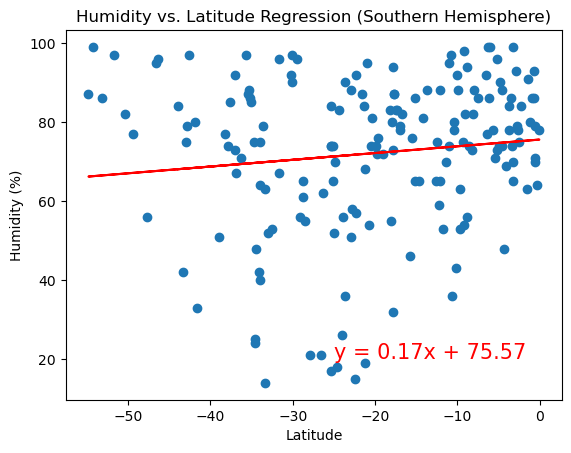

The r-value is: 0.014313355484465102


In [27]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       'Humidity vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Humidity (%)', (-25, 20))

**Discussion about the linear relationship:** For both hemispheres, the regression analysis suggests that there is a very weak positive relationship between latitude and humidity. The closer the latitude is to zero (the equator), the less impact it seems to have on the humidity levels according to these data sets.

The low r-values in both hemispheres indicate that latitude is not a strong predictor of humidity. The scatter of the data points suggests high variability in humidity that is not well-explained by latitude alone. There are likely other climatic and environmental factors at play that influence humidity more than the latitude, such as ocean currents, vegetation, and regional weather patterns.

In practical terms, while there may be a general trend of increasing humidity with latitude in these data sets, predicting humidity levels based on latitude would not be very accurate without taking other factors into consideration.

### Cloudiness vs. Latitude Linear Regression Plot

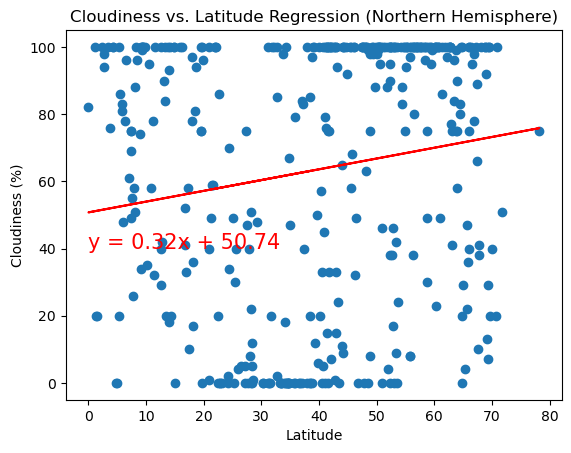

The r-value is: 0.025032656618368548


In [28]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       'Cloudiness vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Cloudiness (%)', (0, 40))

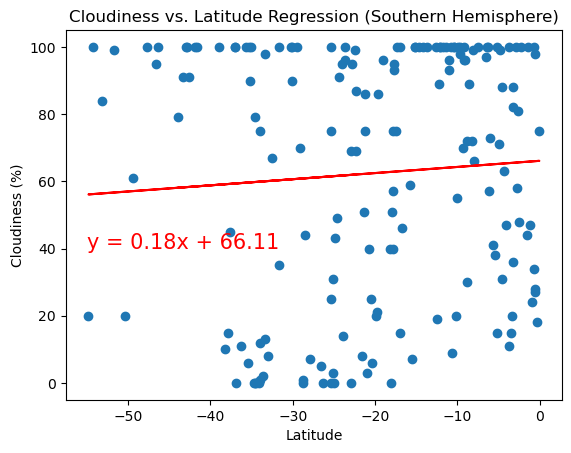

The r-value is: 0.00464088897214667


In [29]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       'Cloudiness vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Cloudiness (%)', (-55, 40))

**Discussion about the linear relationship:** In both hemispheres, the linear regression analysis suggests that there is a very weak positive relationship between latitude and cloudiness. However, given the low r-values in both plots, it can be inferred that latitude is not a reliable predictor of cloudiness. Cloudiness is a complex weather phenomenon influenced by many local environmental factors like atmospheric conditions, ocean currents, and geographical features that are not captured merely by considering latitude.

The weak correlations imply that other factors, possibly local geographical features or specific weather patterns, play a much more significant role in determining cloudiness than simply the latitude. This is evident from the wide spread of data points across all levels of cloudiness, which does not show a strong trend with changing latitude.

### Wind Speed vs. Latitude Linear Regression Plot

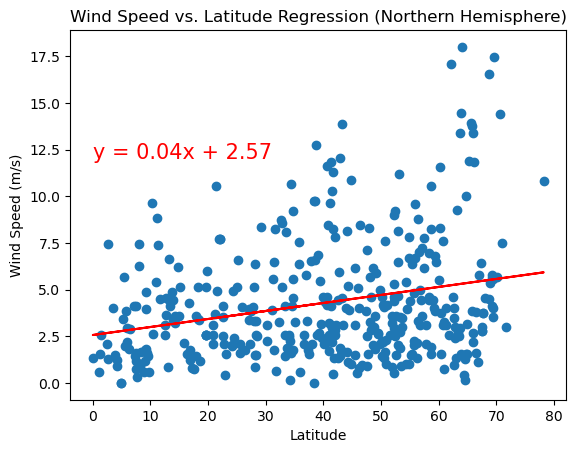

The r-value is: 0.06621301644043699


In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       'Wind Speed vs. Latitude Regression (Northern Hemisphere)', 
                       'Latitude', 'Wind Speed (m/s)', (0, 12))

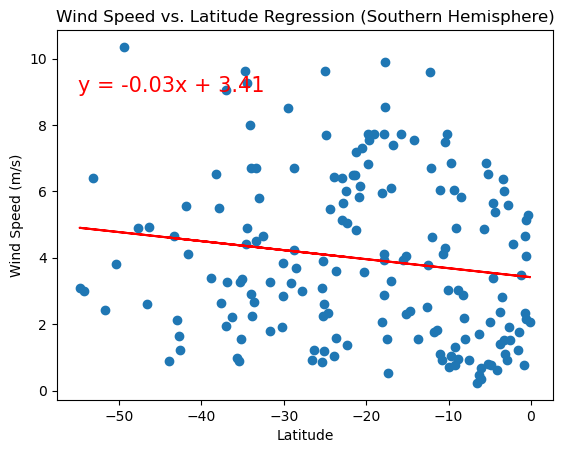

The r-value is: 0.02335981422180404


In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       'Wind Speed vs. Latitude Regression (Southern Hemisphere)', 
                       'Latitude', 'Wind Speed (m/s)', (-55, 9))

**Discussion about the linear relationship:** For both hemispheres, the relationship between wind speed and latitude is weak, with only a slight positive trend in the Northern Hemisphere and a slight negative trend in the Southern Hemisphere. The low r-values in both hemispheres indicate that latitude is not a significant predictor of wind speed.

Wind speed can be affected by a variety of factors including geographic terrain, atmospheric pressure differences, and local weather systems. The weak correlations observed in these plots suggest that such factors likely play a larger role in influencing wind speed than the latitude alone. Therefore, predictions about wind speed based solely on latitude would likely be inaccurate without considering a more comprehensive set of environmental and meteorological factors.